# dp_ml package testing

This notebook goes through a few examples with the dp_ml package:

1. Import packages and data
2. Show some examples of the data and processing methods
3. Set up the learning method
4. Train the model
5. Predict using testing data

## 1. Import packages and data:

In [1]:
import dp_ml
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import pywt
import seaborn
from statsmodels.robust import mad
import tensorflow as tf
from ipywidgets.widgets import interactive, interact
import ipywidgets as widgets

%matplotlib inline

Windows detected, data path found


In [2]:
#dbFile = h5py.File(dp_ml.HDF5Path+'/'+dp_ml.HDF5Filename)

#dbFile = h5py.File('/Users/davidgarrett/Google Drive/Work/Software/machine_learning/postpro/dp_ml_01-Feb-2018.hdf5')
#dbFile = h5py.File('/Users/davidgarrett/Google Drive/Work/Software/machine_learning/postpro/dp_ml_07-Feb-2018.hdf5')
dbFile = h5py.File('C:/Users/dgarrett/Google Drive/Work/Software/machine_learning/postpro/dp_ml_07-Feb-2018.hdf5')
#dbFile = h5py.File('C:/Users/dgarrett/Google Drive/Work/Software/machine_learning/postpro/dp_ml_07-Feb-2018_30mm.hdf5')

dbHier = 'Data/Simulation/CircWG'

X_batch_f, y_batch_f = dp_ml.getBatchFromDB(dbFile,'Data/Simulation/CircWG',0, 10, freqOrTime='frequency',procFx=dp_ml.procIdentity)

## 2. Show examples of the data and processing methods

In [9]:
X_batch_test_f , y_batch_test_f = dp_ml.getBatchFromDB(dbFile, dbHier, 0, 385, freqOrTime='frequency', procFx = dp_ml.procIdentity)

In [20]:
X_batch_max , y_batch_max = dp_ml.getBatchFromDB(dbFile, dbHier, 0, 1350, freqOrTime='time', procFx = dp_ml.getMax)

In [4]:
print(X_batch_max.shape)
print(X_batch_max[0,1,:])

(1350, 3, 2)
[ 5.4243943  0.782    ]


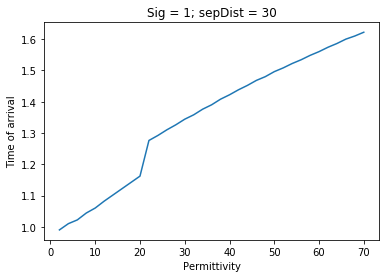

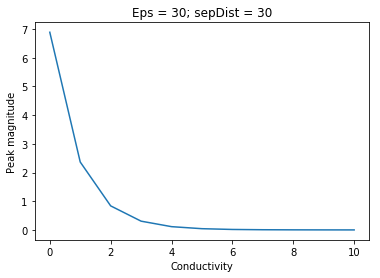

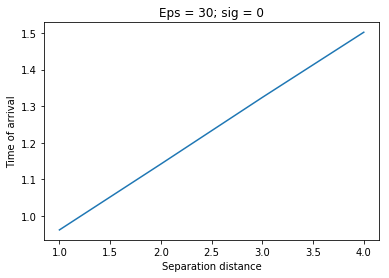

In [21]:
X_filt, y_filt = dp_ml.filterData(X_batch_max, y_batch_max, sig = 5, sepDist = 3)
plt.plot(y_filt[:,0], X_filt[:,2,1])
plt.title('Sig = 1; sepDist = 30')
plt.xlabel('Permittivity')
plt.ylabel('Time of arrival')

X_filt, y_filt = dp_ml.filterData(X_batch_max, y_batch_max, eps=30, sepDist = 3)
plt.figure()
plt.plot(y_filt[:,1], X_filt[:,2,0])
plt.title('Eps = 30; sepDist = 30')
plt.xlabel('Conductivity')
plt.ylabel('Peak magnitude')

plt.figure()
X_filt, y_filt = dp_ml.filterData(X_batch_max, y_batch_max, eps=30, sig = 0)
plt.plot(X_filt[:,0,0], X_filt[:,2,1])
plt.title('Eps = 30; sig = 0')
plt.xlabel('Separation distance')
plt.ylabel('Time of arrival')

### 2.1 Feature expansion:

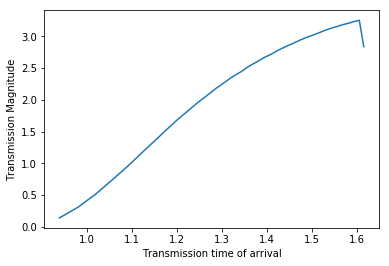

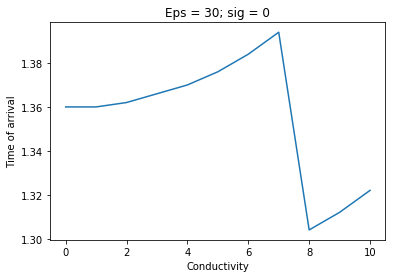

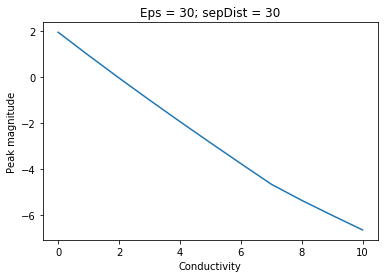

In [25]:
sig = 1


X_filt, y_filt = dp_ml.filterData(X_batch_max, y_batch_max, sig = sig, sepDist = 3)

plt.figure()
plt.plot((X_filt[:,2,1]),X_filt[:,2,0])
plt.xlabel('Transmission time of arrival')
plt.ylabel('Transmission Magnitude')


eps = 34


plt.figure()
X_filt, y_filt = dp_ml.filterData(X_batch_max, y_batch_max, eps=eps, sepDist = 3)
plt.plot(y_filt[:,1], X_filt[:,2,1])
plt.title('Eps = 30; sig = 0')
plt.xlabel('Conductivity')
plt.ylabel('Time of arrival')

X_filt, y_filt = dp_ml.filterData(X_batch_max, y_batch_max, eps=eps, sepDist = 3)
plt.figure()
plt.plot(y_filt[:,1], np.log(X_filt[:,2,0]))
plt.title('Eps = 30; sepDist = 30')
plt.xlabel('Conductivity')
plt.ylabel('Peak magnitude')

In [14]:
X_filt, y_filt = dp_ml.filterData(X_batch_test_f, y_batch_test_f, sig = 0, sepDist = 3)

print(X_filt.shape)
plt.plot(y_filt[:,0],X_filt[:,5,2500])

NameError: name 'X_batch_test_f' is not defined

In [ ]:
X_batch_t, y_batch_t = dp_ml.getBatchFromDB(dbFile, dbHier, 0, 1350, freqOrTime='time', procFx = dp_ml.procIdentity)
X_batch_f, y_batch_f = dp_ml.getBatchFromDB(dbFile, dbHier, 0, 1350, freqOrTime='frequency', procFx = dp_ml.procIdentity)

## 3. Set up the learning method

### 3.1 Setting it up for getMax():

In [26]:
#init, saver, loss, training_op, X_ph, y, logits = dp_ml.setupModel(n_inputs = 10,n_hidden1 =10,n_hidden2=3, batch_size=15, activation_function = tf.nn.sigmoid)
#init, saver, loss, training_op, X_ph, y, logits = dp_ml.setupModel(n_inputs = 10,n_hidden1 =30,n_hidden2=10, batch_size=100, activation_function = tf.nn.sigmoid)
init, saver, loss, training_op, X_ph, y, logits = dp_ml.setupModel(n_inputs = 6,
                        n_hidden1 =200,n_hidden2=100, batch_size=100, 
                        activation_function = tf.nn.relu,opt="adam",
                        learning_rate = 0.01)

## 4. Train the model

In [27]:
#dbFilename = '/Users/davidgarrett/Google Drive/Work/Software/machine_learning/postpro/dp_ml_07-Feb-2018.hdf5'
dbFilename = 'C:/Users/dgarrett/Google Drive/Work/Software/machine_learning/postpro/dp_ml_07-Feb-2018.hdf5'


dbFolder = 'Data/Simulation/CircWG'
dp_ml.runModel(dbFilename, dbFolder, init, saver, loss, training_op, X_ph, y, procFx = dp_ml.getMax, freqOrTime = 'time',batch_size = 100, n_epochs = 1000)

Model filename:  ./Models/ANN_model_20180213-093013_1000-epochs_.ckpt
Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 Train loss: 0.934961624146
1 Train loss: 13.0351379395
2 Train loss: 4.08699707031
3 Train loss: 3.03441833496
4 Train loss: 4.56379211426
5 Train loss: 3.22517974854
6 Train loss: 3.78221801758
7 Train loss: 3.35836151123
8 Train loss: 3.53303619385
9 Train loss: 3.40186401367
10 Train loss: 3.37304046631
11 Train loss: 3.31521942139
12 Train loss: 3.26731201172
13 Train loss: 3.21115997314
14 Train loss: 3.15071105957
15 Train loss: 3.11158050537
16 Train loss: 3.04028747559
17 Train loss: 2.9765435791
18 Train loss: 2.93603607178
19 Train loss: 2.84365539551
20 Train loss: 2.8185748291
21 Train loss: 2.70676208496
22 Train loss: 2.19192749023
23 Train loss: 3.04807861328
24 Train loss: 2.27396453857
25 Train loss: 2.5511579895
26 Train loss: 2.37731674194
27 Train loss: 2.26864196777
28 Train loss: 2.30642776489
29 Train loss: 2.1023995971

258 Train loss: 0.174339733124
259 Train loss: 0.31567527771
260 Train loss: 0.202812385559
261 Train loss: 0.178432693481
262 Train loss: 0.0931902313232
263 Train loss: 0.424596099854
264 Train loss: 0.22658996582
265 Train loss: 0.207223625183
266 Train loss: 0.163944721222
267 Train loss: 0.29648815155
268 Train loss: 0.234824523926
269 Train loss: 0.184895019531
270 Train loss: 0.125231075287
271 Train loss: 0.102447576523
272 Train loss: 0.373611030579
273 Train loss: 0.190395889282
274 Train loss: 0.200008392334
275 Train loss: 0.112172698975
276 Train loss: 0.394809684753
277 Train loss: 0.237676925659
278 Train loss: 0.180031967163
279 Train loss: 0.129299106598
280 Train loss: 0.185859069824
281 Train loss: 0.322122688293
282 Train loss: 0.189848327637
283 Train loss: 0.185972061157
284 Train loss: 0.0806002521515
285 Train loss: 0.406794509888
286 Train loss: 0.226243972778
287 Train loss: 0.181357727051
288 Train loss: 0.190226593018
289 Train loss: 0.289193515778
290 Train

522 Train loss: 0.128499698639
523 Train loss: 0.225375900269
524 Train loss: 0.149690189362
525 Train loss: 0.111785478592
526 Train loss: 0.0820146846771
527 Train loss: 0.295019798279
528 Train loss: 0.20275302887
529 Train loss: 0.0979349803925
530 Train loss: 0.0748073196411
531 Train loss: 0.190305290222
532 Train loss: 0.158150148392
533 Train loss: 0.111935491562
534 Train loss: 0.0938066864014
535 Train loss: 0.16509803772
536 Train loss: 0.211154842377
537 Train loss: 0.133150157928
538 Train loss: 0.0693737077713
539 Train loss: 0.182535877228
540 Train loss: 0.216293449402
541 Train loss: 0.137479810715
542 Train loss: 0.0710814332962
543 Train loss: 0.17949634552
544 Train loss: 0.340478134155
545 Train loss: 0.0911666297913
546 Train loss: 0.0807007884979
547 Train loss: 0.14804933548
548 Train loss: 0.0939888381958
549 Train loss: 0.118122377396
550 Train loss: 0.0702896738052
551 Train loss: 0.150958614349
552 Train loss: 0.137167778015
553 Train loss: 0.225661048889
55

783 Train loss: 0.0402007055283
784 Train loss: 0.0367386102676
785 Train loss: 0.0309694933891
786 Train loss: 0.0588479566574
787 Train loss: 0.0293730831146
788 Train loss: 0.0320452737808
789 Train loss: 0.0349982357025
790 Train loss: 0.0422096395493
791 Train loss: 0.0268284583092
792 Train loss: 0.0239455580711
793 Train loss: 0.0354814958572
794 Train loss: 0.0409645462036
795 Train loss: 0.0316516160965
796 Train loss: 0.0261093306541
797 Train loss: 0.0379083848
798 Train loss: 0.050265007019
799 Train loss: 0.0397224569321
800 Train loss: 0.0304820156097
801 Train loss: 0.0483213996887
802 Train loss: 0.0564705324173
803 Train loss: 0.0585774898529
804 Train loss: 0.0302285432816
805 Train loss: 0.0659115600586
806 Train loss: 0.0469382190704
807 Train loss: 0.0684631252289
808 Train loss: 0.0364495635033
809 Train loss: 0.0488775920868
810 Train loss: 0.0279914045334
811 Train loss: 0.0329376888275
812 Train loss: 0.0230190634727
813 Train loss: 0.0372188901901
814 Train lo

## 5. Predict from the model

In [42]:
model_name = './Models/ANN_model_20180213-093013_1000-epochs_.ckpt'

ind = np.arange(40,50)
X_batch = X_batch_max[ind,:,:].reshape((10,6))
y_pred = dp_ml.predictFromModel(model_name, X_batch, saver, logits, X_ph)

print('True values:',y_batch_max[ind,0], y_batch_max[ind,1])
print('Predicted values:',y_pred[:,0], y_pred[:,1])



INFO:tensorflow:Restoring parameters from ./Models/ANN_model_20180213-093013_1000-epochs_.ckpt
True values: [ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.] [ 0.  0.  0.  0.  1.  1.  1.  1.  2.  2.]
Predicted values: [ 3.4545002   3.75818539  3.35765553  3.40779305  5.22888565  5.75017166
  3.96537352  2.9787569   8.71404266  8.0219965 ] [ 0.28401732  0.01180649  0.15543222 -0.83319736  1.01941729  0.37559199
  0.58504272  3.02690887  3.08561587  3.89999104]


In [35]:
t = np.zeros((2,5,2))
print(t.shape)

t = t.reshape(2,10)
print(t.shape)

(2, 5, 2)
(2, 10)


## Scrap code:

In [ ]:
interact(plotMagPhase,eps=widgets.IntSlider(min=2,max=70,step=2,value=26),
         sig=widgets.IntSlider(min=0,max=10,step=1,value=2),sepDist=widgets.IntSlider(min=10,max=50,step=10,value=30), 
         scale=widgets.FloatSlider(min=0.1,max=5.0,step=0.1,value=1.0, absPlot=True), 
         mode=['transmission','reflection'], domain = ['time', 'frequency']);